In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
import tensorflow as tf
import keras

In [3]:
dataset_train = pd.read_csv('output_Result0.csv')


In [4]:
dataset_train

,F1,F2,F3,F4
0,401.203,1003.485,949.140,792.094
1,421.250,1021.578,925.547,788.015
2,425.719,1035.750,907.328,704.781
3,431.235,1042.703,900.469,766.844
4,433.390,1044.985,902.468,781.000
...,...,...,...,...
632,209.157,482.406,623.969,714.625
633,202.657,491.234,627.188,690.843
634,203.046,492.938,615.297,720.390
635,107.875,419.500,693.657,744.625


In [5]:
dataset_train=dataset_train.rolling(10).mean()

In [6]:
dataset_train

,F1,F2,F3,F4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
632,186.1922,471.4906,650.2078,736.2451
633,186.3235,473.4359,651.3828,732.0997
634,186.9906,475.8813,652.2797,733.2419
635,192.5687,486.7563,647.7283,724.8138


In [7]:
dataset_train.head(12)

,F1,F2,F3,F4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,434.3110,1037.8001,901.6749,741.1248


In [8]:
dataset_train=dataset_train.iloc[9:,:].values

In [9]:
dataset_train

array([[ 434.311 , 1037.8001,  901.6749,  741.1248],
       [ 439.2438, 1041.3719,  895.6578,  733.381 ],
       [ 439.9047, 1040.8891,  887.2797,  722.4185],
       ...,
       [ 186.9906,  475.8813,  652.2797,  733.2419],
       [ 192.5687,  486.7563,  647.7283,  724.8138],
       [ 189.6234,  481.9984,  642.6893,  723.8966]])

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_train_scaled = sc.fit_transform(dataset_train)

In [11]:
dataset_train_scaled

array([[0.96737777, 0.90778795, 0.80694798, 0.37373319],
       [0.97863714, 0.91125169, 0.79699429, 0.35879472],
       [0.98014568, 0.91078349, 0.78313496, 0.3376471 ],
       ...,
       [0.4028562 , 0.36286962, 0.3943901 , 0.35852639],
       [0.4155885 , 0.37341561, 0.38686102, 0.34226784],
       [0.4088657 , 0.36880165, 0.37852534, 0.34049848]])

In [12]:
dataset_train_scaled

array([[0.96737777, 0.90778795, 0.80694798, 0.37373319],
       [0.97863714, 0.91125169, 0.79699429, 0.35879472],
       [0.98014568, 0.91078349, 0.78313496, 0.3376471 ],
       ...,
       [0.4028562 , 0.36286962, 0.3943901 , 0.35852639],
       [0.4155885 , 0.37341561, 0.38686102, 0.34226784],
       [0.4088657 , 0.36880165, 0.37852534, 0.34049848]])

In [13]:
dataset_train_result = pd.read_csv('SOH_RESULT12.csv')


In [14]:
dataset_train_result

,SOH
0,0.928244
1,0.923164
2,0.917675
3,0.917631
4,0.917323
...,...
632,0.677398
633,0.670526
634,0.666465
635,0.665487


In [15]:
dataset_train_result=dataset_train_result.rolling(10).mean()

In [16]:
dataset_train_result

,SOH
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
632,0.686977
633,0.683707
634,0.680679
635,0.677815


In [17]:
dataset_train_result.head(10)

,SOH
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,0.917701


In [18]:
dataset_train_result=dataset_train_result.iloc[9:,:].values

In [19]:
dataset_train_result

array([[0.91770118],
       [0.91610779],
       [0.91450152],
       [0.91342167],
       [0.91233057],
       [0.91072819],
       [0.90905045],
       [0.90742212],
       [0.9062877 ],
       [0.90518789],
       [0.90630852],
       [0.90744841],
       [0.90854719],
       [0.90914862],
       [0.90973227],
       [0.91088145],
       [0.91147766],
       [0.91208714],
       [0.9126322 ],
       [0.9126316 ],
       [0.91048415],
       [0.91070341],
       [0.91042974],
       [0.9096061 ],
       [0.90858091],
       [0.90727069],
       [0.90599129],
       [0.90439899],
       [0.9023522 ],
       [0.90086581],
       [0.89905556],
       [0.89458119],
       [0.89142686],
       [0.88909488],
       [0.88645091],
       [0.88357453],
       [0.88095694],
       [0.88149199],
       [0.88199975],
       [0.88171608],
       [0.88117336],
       [0.88040114],
       [0.87910614],
       [0.87779384],
       [0.8765234 ],
       [0.87522125],
       [0.87394335],
       [0.869

In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_setY_scaled = sc.fit_transform(dataset_train_result)

In [21]:
training_setY_scaled

array([[0.84402423],
       [0.84008695],
       [0.83611787],
       [0.83344956],
       [0.83075345],
       [0.82679398],
       [0.82264829],
       [0.81862468],
       [0.81582152],
       [0.81310389],
       [0.81587298],
       [0.81868964],
       [0.82140471],
       [0.82289084],
       [0.82433306],
       [0.82717267],
       [0.82864591],
       [0.83015195],
       [0.83149877],
       [0.8314973 ],
       [0.82619095],
       [0.82673275],
       [0.82605649],
       [0.82402128],
       [0.82148804],
       [0.81825049],
       [0.8150891 ],
       [0.81115451],
       [0.80609691],
       [0.80242403],
       [0.79795091],
       [0.78689474],
       [0.7791004 ],
       [0.77333808],
       [0.76680483],
       [0.75969731],
       [0.75322924],
       [0.75455134],
       [0.75580603],
       [0.75510506],
       [0.75376401],
       [0.75185585],
       [0.7486559 ],
       [0.74541323],
       [0.74227398],
       [0.73905636],
       [0.73589867],
       [0.725

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and remaining data
X_train, X_rem, y_train, y_rem = train_test_split(dataset_train_scaled, training_setY_scaled, test_size=0.3,shuffle=False, random_state=42)



In [23]:

# Split the remaining data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5,shuffle=False, random_state=42)

In [24]:
X_train


array([[0.96737777, 0.90778795, 0.80694798, 0.37373319],
       [0.97863714, 0.91125169, 0.79699429, 0.35879472],
       [0.98014568, 0.91078349, 0.78313496, 0.3376471 ],
       ...,
       [0.46714587, 0.62600255, 0.70547366, 0.35846986],
       [0.4637791 , 0.62283866, 0.70320174, 0.36007351],
       [0.45968124, 0.61891729, 0.70050831, 0.36243047]])

In [25]:
print(X_train.shape), print(y_train.shape),print(X_val.shape), print(y_val.shape),print(X_test.shape), print(y_test.shape)

(439, 4)
(439, 1)
(94, 4)
(94, 1)
(95, 4)
(95, 1)


(None, None, None, None, None, None)

In [26]:
X_train1 = X_train[:, 0:1]  
X_train2 = X_train[:, 1:2]  
X_train3 = X_train[:, 2:3]  
X_train4 = X_train[:, 3:] 

In [27]:
X_test1 = X_test[:, 0:1]  
X_test2 = X_test[:, 1:2]  
X_test3 = X_test[:, 2:3]  
X_test4 = X_test[:, 3:] 

In [28]:
X_val1 = X_val[:, 0:1]  
X_val2 = X_val[:, 1:2]  
X_val3 = X_val[:, 2:3]  
X_val4 = X_val[:, 3:] 

In [29]:
X_train1.shape

(439, 1)

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU,LSTM,SimpleRNN
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Activation
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense,add, concatenate
from keras.callbacks import Callback
from tensorflow.keras.layers import Input, GRU, Dense,add, concatenate
from keras.callbacks import Callback
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

In [31]:
input_shape_1 =(X_train1.shape[1], 1)
input_shape_2 = (X_train2.shape[1], 1)
input_shape_3 =(X_train3.shape[1], 1)
input_shape_4 = (X_train4.shape[1], 1)

In [32]:
input_shape_1

(1, 1)

In [33]:
input_1 = Input(shape=input_shape_1)
input_2 = Input(shape=input_shape_2)
input_3 = Input(shape=input_shape_3)
input_4 = Input(shape=input_shape_4)

In [34]:
print(input_2)

KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")


In [35]:
input_1

<KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'input_1')>

In [36]:
initial_lr = 0.01
decay_rate = 0.99
decay_steps = 10000

class LearningRateUpdater(Callback):
    def __init__(self, initial_lr, decay_rate, decay_steps):
        super(LearningRateUpdater, self).__init__()
        self.initial_lr = initial_lr
        self.decay_rate = decay_rate
        self.decay_steps = decay_steps

    def on_epoch_begin(self, epoch, logs=None):
        lr = self.initial_lr * math.pow(self.decay_rate, (epoch + 1) // self.decay_steps)
        self.model.optimizer.lr.assign(lr)
        print("Learning rate updated to:", lr)


# Create the optimizer with the initial learning rate
optimizer = Adam(learning_rate=initial_lr)




# Create the learning rate updater callback
lr_updater_callback = LearningRateUpdater(initial_lr, decay_rate, decay_steps)



In [37]:
# def lr_scheduler(epoch, lr):
#     if epoch % 10000 == 0 and epoch > 0:
#         lr *= 0.99
#     return lr
# def lr_scheduler(epoch, lr):
        
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_lr, decay_steps=decay_steps, decay_rate=decay_rate, staircase=False)


#lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

In [38]:
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

In [39]:
class LearningRateLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.lr
        if isinstance(lr, tf.keras.optimizers.schedules.LearningRateSchedule):
            lr = lr(self.model.optimizer.iterations)
        print(f'\nLearning rate after epoch {epoch} is {lr:.4f}\n')

In [40]:
# optimizer = keras.optimizers.Adam(learning_rate=0.01)

In [41]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense,add,Lambda,Flatten

# Define the first parallel recurrent layer with return_sequences=True
rnn_1 =LSTM(units=11)(input_1)
dropout1 = Dropout(rate=0.01)(rnn_1)

# Define the second parallel recurrent layer
rnn_2 = LSTM(units=11)(input_2)
dropout2 = Dropout(rate=0.01)(rnn_2)

# Define the third parallel recurrent layer
rnn_3 =LSTM(units=11)(input_3)
dropout3 = Dropout(rate=0.01)(rnn_3)

# Define the fourth parallel recurrent layer
rnn_4 = LSTM(units=11)(input_4)
dropout4 = Dropout(rate=0.01)(rnn_4)

# Concatenate the outputs of the recurrent layers
merged = concatenate([dropout1, dropout2, dropout3, dropout4], axis=1)



# Flatten the merged output
flatten = Flatten()(merged)

# ...
activation_layer = Activation('tanh')(flatten)
dense1 = Dense(units=50, activation='tanh')(activation_layer)#,kernel_regularizer=regularizers.l1(0.001))(activation_layer)
dense1 = BatchNormalization()(dense1)
dense2 = Dense(units=25, activation='relu')(dense1)# kernel_regularizer=regularizers.l1(0.001))(dense1)
dense2 = BatchNormalization()(dense2)



# Define the output layer
output = Dense(units=1, activation='sigmoid')(dense2)


# Create the model with the inputs and output
regressor = Model(inputs=[input_1, input_2,input_3, input_4], outputs=output)

# Compile the model with the desired optimizer, loss function, and metrics
regressor.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model with the training data
result=regressor.fit([X_train1, X_train2,X_train3, X_train4], y_train, epochs=1000, batch_size=25,validation_data=([X_val1, X_val2,X_val3, X_val4], y_val),callbacks=[LearningRateLogger()])


Epoch 1/1000
 1/18 [>.............................] - ETA: 46s - loss: 0.1151 - mae: 0.2658
Learning rate after epoch 0 is 0.0100

18/18 [==============================] - 4s 51ms/step - loss: 0.0138 - mae: 0.0808 - val_loss: 0.0260 - val_mae: 0.1526
Epoch 2/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0036 - mae: 0.0497
Learning rate after epoch 1 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0057 - mae: 0.0594 - val_loss: 0.0277 - val_mae: 0.1574
Epoch 3/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0013 - mae: 0.0253
Learning rate after epoch 2 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0045 - mae: 0.0530 - val_loss: 0.0276 - val_mae: 0.1555
Epoch 4/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0011 - mae: 0.0274
Learning rate after epoch 3 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0033 - mae: 0.0468 - val_loss: 0.0278 - val_mae: 0.1535
Ep

Epoch 34/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0047 - mae: 0.0602
Learning rate after epoch 33 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0044 - mae: 0.0499 - val_loss: 0.0163 - val_mae: 0.1232
Epoch 35/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0025 - mae: 0.0399
Learning rate after epoch 34 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0032 - mae: 0.0463 - val_loss: 0.0078 - val_mae: 0.0620
Epoch 36/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0113 - mae: 0.0979
Learning rate after epoch 35 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0032 - mae: 0.0446 - val_loss: 0.0267 - val_mae: 0.1377
Epoch 37/1000
 1/18 [>.............................] - ETA: 0s - loss: 9.9543e-04 - mae: 0.0267
Learning rate after epoch 36 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0048 - mae: 0.0560 - val_loss: 0.0129 - val_mae:

Epoch 67/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0011 - mae: 0.0290
Learning rate after epoch 66 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0026 - mae: 0.0392 - val_loss: 0.0832 - val_mae: 0.2865
Epoch 68/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0048 - mae: 0.0629
Learning rate after epoch 67 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0056 - mae: 0.0606 - val_loss: 0.1174 - val_mae: 0.3331
Epoch 69/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0049 - mae: 0.0605
Learning rate after epoch 68 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0036 - mae: 0.0470 - val_loss: 0.0707 - val_mae: 0.2587
Epoch 70/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0012 - mae: 0.0266
Learning rate after epoch 69 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0051 - mae: 0.0576 - val_loss: 0.0051 - val_mae: 0.0

Epoch 100/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0040 - mae: 0.0533
Learning rate after epoch 99 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0025 - mae: 0.0398 - val_loss: 0.0275 - val_mae: 0.1587
Epoch 101/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0144 - mae: 0.1148
Learning rate after epoch 100 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0040 - mae: 0.0486 - val_loss: 0.0062 - val_mae: 0.0687
Epoch 102/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0028 - mae: 0.0394
Learning rate after epoch 101 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0032 - mae: 0.0461 - val_loss: 0.0194 - val_mae: 0.1334
Epoch 103/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0044 - mae: 0.0585
Learning rate after epoch 102 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0030 - mae: 0.0427 - val_loss: 0.0165 - val_m

 1/18 [>.............................] - ETA: 0s - loss: 0.0030 - mae: 0.0453
Learning rate after epoch 131 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0038 - mae: 0.0460 - val_loss: 0.0163 - val_mae: 0.1127
Epoch 133/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0030 - mae: 0.0481
Learning rate after epoch 132 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0033 - mae: 0.0485 - val_loss: 0.0034 - val_mae: 0.0411
Epoch 134/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0036 - mae: 0.0501
Learning rate after epoch 133 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0039 - mae: 0.0496 - val_loss: 0.0015 - val_mae: 0.0263
Epoch 135/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0030 - mae: 0.0502
Learning rate after epoch 134 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0033 - mae: 0.0474 - val_loss: 9.9933e-04 - val_mae: 0.0213

 1/18 [>.............................] - ETA: 0s - loss: 0.0020 - mae: 0.0376
Learning rate after epoch 163 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0043 - mae: 0.0515 - val_loss: 0.0017 - val_mae: 0.0392
Epoch 165/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0037 - mae: 0.0504
Learning rate after epoch 164 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0034 - mae: 0.0457 - val_loss: 0.0238 - val_mae: 0.1506
Epoch 166/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0067 - mae: 0.0722
Learning rate after epoch 165 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0035 - mae: 0.0442 - val_loss: 0.0236 - val_mae: 0.1507
Epoch 167/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0017 - mae: 0.0378
Learning rate after epoch 166 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0024 - mae: 0.0402 - val_loss: 0.0170 - val_mae: 0.1280
Epo

 1/18 [>.............................] - ETA: 0s - loss: 0.0019 - mae: 0.0393
Learning rate after epoch 195 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0040 - mae: 0.0508 - val_loss: 9.9375e-04 - val_mae: 0.0255
Epoch 197/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0014 - mae: 0.0339
Learning rate after epoch 196 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0033 - mae: 0.0482 - val_loss: 0.0052 - val_mae: 0.0703
Epoch 198/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0018 - mae: 0.0343
Learning rate after epoch 197 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0398 - val_loss: 0.0068 - val_mae: 0.0798
Epoch 199/1000
 1/18 [>.............................] - ETA: 0s - loss: 4.0250e-04 - mae: 0.0142
Learning rate after epoch 198 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0379 - val_loss: 0.0048 - val_mae: 0.

 1/18 [>.............................] - ETA: 0s - loss: 0.0022 - mae: 0.0396
Learning rate after epoch 227 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0029 - mae: 0.0447 - val_loss: 0.0019 - val_mae: 0.0412
Epoch 229/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0028 - mae: 0.0483
Learning rate after epoch 228 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0030 - mae: 0.0448 - val_loss: 0.0048 - val_mae: 0.0608
Epoch 230/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0024 - mae: 0.0426
Learning rate after epoch 229 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0391 - val_loss: 0.0120 - val_mae: 0.1031
Epoch 231/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0016 - mae: 0.0364
Learning rate after epoch 230 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0024 - mae: 0.0386 - val_loss: 0.0079 - val_mae: 0.0788
Epo

 1/18 [>.............................] - ETA: 0s - loss: 0.0112 - mae: 0.1007
Learning rate after epoch 259 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0039 - mae: 0.0500 - val_loss: 0.0039 - val_mae: 0.0425
Epoch 261/1000
 1/18 [>.............................] - ETA: 0s - loss: 5.7949e-04 - mae: 0.0160
Learning rate after epoch 260 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0030 - mae: 0.0438 - val_loss: 0.0074 - val_mae: 0.0724
Epoch 262/1000
 1/18 [>.............................] - ETA: 0s - loss: 8.8260e-04 - mae: 0.0213
Learning rate after epoch 261 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0029 - mae: 0.0450 - val_loss: 0.0050 - val_mae: 0.0560
Epoch 263/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0044 - mae: 0.0637
Learning rate after epoch 262 is 0.0100

18/18 [==============================] - 0s 4ms/step - loss: 0.0026 - mae: 0.0407 - val_loss: 0.0033 - val_mae: 0.

 1/18 [>.............................] - ETA: 0s - loss: 0.0015 - mae: 0.0339
Learning rate after epoch 291 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0033 - mae: 0.0441 - val_loss: 0.0015 - val_mae: 0.0332
Epoch 293/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0018 - mae: 0.0364
Learning rate after epoch 292 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0380 - val_loss: 0.0026 - val_mae: 0.0346
Epoch 294/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0034 - mae: 0.0482
Learning rate after epoch 293 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0028 - mae: 0.0427 - val_loss: 0.0014 - val_mae: 0.0244
Epoch 295/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0023 - mae: 0.0414
Learning rate after epoch 294 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0032 - mae: 0.0460 - val_loss: 0.0029 - val_mae: 0.0378
Epo

 1/18 [>.............................] - ETA: 0s - loss: 0.0012 - mae: 0.0304
Learning rate after epoch 323 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0030 - mae: 0.0430 - val_loss: 0.0023 - val_mae: 0.0395
Epoch 325/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0039 - mae: 0.0573
Learning rate after epoch 324 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0027 - mae: 0.0392 - val_loss: 0.0033 - val_mae: 0.0394
Epoch 326/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0031 - mae: 0.0491
Learning rate after epoch 325 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0386 - val_loss: 7.6465e-04 - val_mae: 0.0199
Epoch 327/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0020 - mae: 0.0383
Learning rate after epoch 326 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0028 - mae: 0.0416 - val_loss: 0.0032 - val_mae: 0.0475

 1/18 [>.............................] - ETA: 0s - loss: 6.9929e-04 - mae: 0.0235
Learning rate after epoch 355 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0032 - mae: 0.0429 - val_loss: 0.0062 - val_mae: 0.0739
Epoch 357/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0046 - mae: 0.0618
Learning rate after epoch 356 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0043 - mae: 0.0527 - val_loss: 0.0045 - val_mae: 0.0639
Epoch 358/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0013 - mae: 0.0247
Learning rate after epoch 357 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0025 - mae: 0.0362 - val_loss: 0.0031 - val_mae: 0.0527
Epoch 359/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0011 - mae: 0.0292
Learning rate after epoch 358 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0034 - mae: 0.0473 - val_loss: 8.1706e-04 - val_mae: 0.

 1/18 [>.............................] - ETA: 0s - loss: 0.0026 - mae: 0.0390
Learning rate after epoch 387 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0026 - mae: 0.0413 - val_loss: 4.8149e-04 - val_mae: 0.0173
Epoch 389/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0011 - mae: 0.0263
Learning rate after epoch 388 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0357 - val_loss: 0.0025 - val_mae: 0.0456
Epoch 390/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0030 - mae: 0.0512
Learning rate after epoch 389 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0037 - mae: 0.0463 - val_loss: 0.0032 - val_mae: 0.0520
Epoch 391/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0022 - mae: 0.0391
Learning rate after epoch 390 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0030 - mae: 0.0454 - val_loss: 0.0034 - val_mae: 0.0551

 1/18 [>.............................] - ETA: 0s - loss: 0.0023 - mae: 0.0429
Learning rate after epoch 419 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0029 - mae: 0.0418 - val_loss: 0.0023 - val_mae: 0.0316
Epoch 421/1000
 1/18 [>.............................] - ETA: 0s - loss: 9.7614e-04 - mae: 0.0283
Learning rate after epoch 420 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0344 - val_loss: 0.0030 - val_mae: 0.0506
Epoch 422/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0113 - mae: 0.1039
Learning rate after epoch 421 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0037 - mae: 0.0474 - val_loss: 0.0048 - val_mae: 0.0626
Epoch 423/1000
 1/18 [>.............................] - ETA: 0s - loss: 5.6895e-04 - mae: 0.0201
Learning rate after epoch 422 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0030 - mae: 0.0403 - val_loss: 0.0064 - val_mae: 0.

 1/18 [>.............................] - ETA: 0s - loss: 0.0017 - mae: 0.0364
Learning rate after epoch 451 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0040 - mae: 0.0485 - val_loss: 9.9092e-04 - val_mae: 0.0262
Epoch 453/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0024 - mae: 0.0411
Learning rate after epoch 452 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0027 - mae: 0.0418 - val_loss: 4.6616e-04 - val_mae: 0.0174
Epoch 454/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0017 - mae: 0.0389
Learning rate after epoch 453 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0025 - mae: 0.0369 - val_loss: 0.0011 - val_mae: 0.0227
Epoch 455/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0012 - mae: 0.0284
Learning rate after epoch 454 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0028 - mae: 0.0418 - val_loss: 0.0030 - val_mae: 0.

 1/18 [>.............................] - ETA: 0s - loss: 0.0080 - mae: 0.0867
Learning rate after epoch 483 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0024 - mae: 0.0411 - val_loss: 0.0013 - val_mae: 0.0314
Epoch 485/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0021 - mae: 0.0396
Learning rate after epoch 484 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0034 - mae: 0.0478 - val_loss: 0.0024 - val_mae: 0.0437
Epoch 486/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0046 - mae: 0.0621
Learning rate after epoch 485 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0398 - val_loss: 0.0037 - val_mae: 0.0528
Epoch 487/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0038 - mae: 0.0544
Learning rate after epoch 486 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0017 - mae: 0.0334 - val_loss: 0.0019 - val_mae: 0.0300
Epo

 1/18 [>.............................] - ETA: 0s - loss: 4.0280e-04 - mae: 0.0160
Learning rate after epoch 515 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0337 - val_loss: 0.0010 - val_mae: 0.0229
Epoch 517/1000
 1/18 [>.............................] - ETA: 0s - loss: 8.1844e-04 - mae: 0.0233
Learning rate after epoch 516 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0035 - mae: 0.0475 - val_loss: 7.3422e-04 - val_mae: 0.0182
Epoch 518/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0030 - mae: 0.0446
Learning rate after epoch 517 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0025 - mae: 0.0407 - val_loss: 0.0030 - val_mae: 0.0464
Epoch 519/1000
 1/18 [>.............................] - ETA: 0s - loss: 7.3407e-04 - mae: 0.0215
Learning rate after epoch 518 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0373 - val_loss: 0.0044 - val

 1/18 [>.............................] - ETA: 0s - loss: 0.0014 - mae: 0.0325
Learning rate after epoch 547 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0021 - mae: 0.0393 - val_loss: 0.0031 - val_mae: 0.0513
Epoch 549/1000
 1/18 [>.............................] - ETA: 0s - loss: 3.3616e-04 - mae: 0.0156
Learning rate after epoch 548 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0393 - val_loss: 0.0021 - val_mae: 0.0288
Epoch 550/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0039 - mae: 0.0562
Learning rate after epoch 549 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0362 - val_loss: 0.0027 - val_mae: 0.0442
Epoch 551/1000
 1/18 [>.............................] - ETA: 0s - loss: 6.6903e-04 - mae: 0.0206
Learning rate after epoch 550 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0029 - mae: 0.0424 - val_loss: 0.0021 - val_mae: 0.

 1/18 [>.............................] - ETA: 0s - loss: 8.3348e-04 - mae: 0.0236
Learning rate after epoch 579 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0350 - val_loss: 0.0019 - val_mae: 0.0334
Epoch 581/1000
 1/18 [>.............................] - ETA: 0s - loss: 4.2527e-04 - mae: 0.0181
Learning rate after epoch 580 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0018 - mae: 0.0336 - val_loss: 0.0031 - val_mae: 0.0521
Epoch 582/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0057 - mae: 0.0701
Learning rate after epoch 581 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0027 - mae: 0.0412 - val_loss: 0.0013 - val_mae: 0.0247
Epoch 583/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0015 - mae: 0.0307
Learning rate after epoch 582 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0026 - mae: 0.0413 - val_loss: 5.5985e-04 - val_mae

 1/18 [>.............................] - ETA: 0s - loss: 0.0016 - mae: 0.0295
Learning rate after epoch 611 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0041 - mae: 0.0489 - val_loss: 0.0020 - val_mae: 0.0393
Epoch 613/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0018 - mae: 0.0377
Learning rate after epoch 612 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0029 - mae: 0.0446 - val_loss: 6.5294e-04 - val_mae: 0.0189
Epoch 614/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0134 - mae: 0.1118
Learning rate after epoch 613 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0039 - mae: 0.0518 - val_loss: 6.8997e-04 - val_mae: 0.0161
Epoch 615/1000
 1/18 [>.............................] - ETA: 0s - loss: 6.0246e-04 - mae: 0.0178
Learning rate after epoch 614 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0027 - mae: 0.0412 - val_loss: 0.0029 - val_mae

 1/18 [>.............................] - ETA: 0s - loss: 0.0036 - mae: 0.0584
Learning rate after epoch 643 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0018 - mae: 0.0347 - val_loss: 0.0011 - val_mae: 0.0278
Epoch 645/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0025 - mae: 0.0441
Learning rate after epoch 644 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0031 - mae: 0.0459 - val_loss: 0.0011 - val_mae: 0.0240
Epoch 646/1000
 1/18 [>.............................] - ETA: 0s - loss: 6.6184e-04 - mae: 0.0207
Learning rate after epoch 645 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0021 - mae: 0.0383 - val_loss: 0.0011 - val_mae: 0.0266
Epoch 647/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0020 - mae: 0.0369
Learning rate after epoch 646 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0021 - mae: 0.0362 - val_loss: 0.0012 - val_mae: 0.0227

 1/18 [>.............................] - ETA: 0s - loss: 0.0037 - mae: 0.0506
Learning rate after epoch 675 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0021 - mae: 0.0374 - val_loss: 0.0033 - val_mae: 0.0369
Epoch 677/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0045 - mae: 0.0633
Learning rate after epoch 676 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0031 - mae: 0.0465 - val_loss: 0.0024 - val_mae: 0.0422
Epoch 678/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0014 - mae: 0.0337
Learning rate after epoch 677 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0308 - val_loss: 7.7171e-04 - val_mae: 0.0190
Epoch 679/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0031 - mae: 0.0525
Learning rate after epoch 678 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0029 - mae: 0.0441 - val_loss: 0.0019 - val_mae: 0.0400

 1/18 [>.............................] - ETA: 0s - loss: 0.0025 - mae: 0.0428
Learning rate after epoch 707 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0039 - mae: 0.0535 - val_loss: 0.0011 - val_mae: 0.0247
Epoch 709/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0050 - mae: 0.0636
Learning rate after epoch 708 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0026 - mae: 0.0406 - val_loss: 8.6352e-04 - val_mae: 0.0195
Epoch 710/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0012 - mae: 0.0253
Learning rate after epoch 709 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0359 - val_loss: 0.0020 - val_mae: 0.0388
Epoch 711/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0012 - mae: 0.0309
Learning rate after epoch 710 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0029 - mae: 0.0388 - val_loss: 0.0010 - val_mae: 0.0251

 1/18 [>.............................] - ETA: 0s - loss: 0.0019 - mae: 0.0396
Learning rate after epoch 739 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0403 - val_loss: 0.0021 - val_mae: 0.0348
Epoch 741/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0012 - mae: 0.0267
Learning rate after epoch 740 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0024 - mae: 0.0400 - val_loss: 0.0018 - val_mae: 0.0303
Epoch 742/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0014 - mae: 0.0292
Learning rate after epoch 741 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0037 - mae: 0.0440 - val_loss: 6.1447e-04 - val_mae: 0.0188
Epoch 743/1000
 1/18 [>.............................] - ETA: 0s - loss: 7.5787e-04 - mae: 0.0197
Learning rate after epoch 742 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0028 - mae: 0.0422 - val_loss: 5.4184e-04 - val_mae

 1/18 [>.............................] - ETA: 0s - loss: 0.0024 - mae: 0.0457
Learning rate after epoch 771 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0395 - val_loss: 0.0013 - val_mae: 0.0300
Epoch 773/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0036 - mae: 0.0572
Learning rate after epoch 772 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0017 - mae: 0.0322 - val_loss: 0.0013 - val_mae: 0.0328
Epoch 774/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0011 - mae: 0.0289
Learning rate after epoch 773 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0021 - mae: 0.0340 - val_loss: 0.0027 - val_mae: 0.0488
Epoch 775/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0072 - mae: 0.0811
Learning rate after epoch 774 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0034 - mae: 0.0483 - val_loss: 0.0016 - val_mae: 0.0302
Epo

 1/18 [>.............................] - ETA: 0s - loss: 7.8846e-04 - mae: 0.0240
Learning rate after epoch 803 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0027 - mae: 0.0440 - val_loss: 0.0018 - val_mae: 0.0377
Epoch 805/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0044 - mae: 0.0633
Learning rate after epoch 804 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0021 - mae: 0.0365 - val_loss: 0.0012 - val_mae: 0.0252
Epoch 806/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0031 - mae: 0.0504
Learning rate after epoch 805 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0025 - mae: 0.0414 - val_loss: 0.0029 - val_mae: 0.0337
Epoch 807/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0014 - mae: 0.0310
Learning rate after epoch 806 is 0.0099

18/18 [==============================] - 0s 4ms/step - loss: 0.0027 - mae: 0.0409 - val_loss: 0.0040 - val_mae: 0.0536

 1/18 [>.............................] - ETA: 0s - loss: 0.0021 - mae: 0.0444
Learning rate after epoch 835 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0024 - mae: 0.0378 - val_loss: 0.0018 - val_mae: 0.0363
Epoch 837/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0011 - mae: 0.0284
Learning rate after epoch 836 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0025 - mae: 0.0418 - val_loss: 0.0021 - val_mae: 0.0271
Epoch 838/1000
 1/18 [>.............................] - ETA: 0s - loss: 4.4021e-04 - mae: 0.0176
Learning rate after epoch 837 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0027 - mae: 0.0422 - val_loss: 0.0020 - val_mae: 0.0333
Epoch 839/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0036 - mae: 0.0502
Learning rate after epoch 838 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0025 - mae: 0.0402 - val_loss: 0.0033 - val_mae: 0.0412

 1/18 [>.............................] - ETA: 0s - loss: 8.5024e-04 - mae: 0.0234
Learning rate after epoch 867 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0371 - val_loss: 0.0020 - val_mae: 0.0275
Epoch 869/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0017 - mae: 0.0385
Learning rate after epoch 868 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0027 - mae: 0.0440 - val_loss: 0.0020 - val_mae: 0.0308
Epoch 870/1000
 1/18 [>.............................] - ETA: 0s - loss: 3.5919e-04 - mae: 0.0148
Learning rate after epoch 869 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0352 - val_loss: 0.0026 - val_mae: 0.0378
Epoch 871/1000
 1/18 [>.............................] - ETA: 0s - loss: 4.6513e-04 - mae: 0.0165
Learning rate after epoch 870 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0032 - mae: 0.0462 - val_loss: 0.0032 - val_mae

 1/18 [>.............................] - ETA: 0s - loss: 4.1243e-04 - mae: 0.0177
Learning rate after epoch 899 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0026 - mae: 0.0392 - val_loss: 0.0012 - val_mae: 0.0224
Epoch 901/1000
 1/18 [>.............................] - ETA: 0s - loss: 9.1633e-04 - mae: 0.0261
Learning rate after epoch 900 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0308 - val_loss: 0.0021 - val_mae: 0.0429
Epoch 902/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0022 - mae: 0.0398
Learning rate after epoch 901 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0029 - mae: 0.0396 - val_loss: 0.0021 - val_mae: 0.0405
Epoch 903/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0042 - mae: 0.0588
Learning rate after epoch 902 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0028 - mae: 0.0433 - val_loss: 0.0016 - val_mae: 0.

 1/18 [>.............................] - ETA: 0s - loss: 0.0013 - mae: 0.0305
Learning rate after epoch 931 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0028 - mae: 0.0400 - val_loss: 0.0047 - val_mae: 0.0639
Epoch 933/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0016 - mae: 0.0374
Learning rate after epoch 932 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0024 - mae: 0.0393 - val_loss: 0.0027 - val_mae: 0.0478
Epoch 934/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0012 - mae: 0.0273
Learning rate after epoch 933 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0354 - val_loss: 0.0016 - val_mae: 0.0369
Epoch 935/1000
 1/18 [>.............................] - ETA: 0s - loss: 9.9017e-04 - mae: 0.0238
Learning rate after epoch 934 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0323 - val_loss: 0.0023 - val_mae: 0.0429

 1/18 [>.............................] - ETA: 0s - loss: 0.0072 - mae: 0.0819
Learning rate after epoch 963 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0029 - mae: 0.0428 - val_loss: 0.0054 - val_mae: 0.0619
Epoch 965/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0021 - mae: 0.0416
Learning rate after epoch 964 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0342 - val_loss: 0.0023 - val_mae: 0.0370
Epoch 966/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0024 - mae: 0.0429
Learning rate after epoch 965 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0374 - val_loss: 0.0021 - val_mae: 0.0288
Epoch 967/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0012 - mae: 0.0326
Learning rate after epoch 966 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0363 - val_loss: 0.0021 - val_mae: 0.0373
Epo

 1/18 [>.............................] - ETA: 0s - loss: 0.0064 - mae: 0.0735
Learning rate after epoch 995 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0021 - mae: 0.0370 - val_loss: 0.0020 - val_mae: 0.0368
Epoch 997/1000
 1/18 [>.............................] - ETA: 0s - loss: 9.9098e-04 - mae: 0.0271
Learning rate after epoch 996 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0016 - mae: 0.0323 - val_loss: 0.0017 - val_mae: 0.0260
Epoch 998/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0017 - mae: 0.0392
Learning rate after epoch 997 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0029 - mae: 0.0448 - val_loss: 0.0025 - val_mae: 0.0462
Epoch 999/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0111 - mae: 0.0989
Learning rate after epoch 998 is 0.0098

18/18 [==============================] - 0s 4ms/step - loss: 0.0028 - mae: 0.0420 - val_loss: 0.0015 - val_mae: 0.0277

In [42]:
regressor.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 1)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 1)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1, 1)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1, 1)]       0           []                               
                                                                                              

In [43]:
# Predict on the training data
trainPredict = regressor.predict([X_train1, X_train2, X_train3, X_train4])

14/14 [==============================] - 1s 1ms/step


In [44]:
trainPredict.shape

(439, 1)

In [45]:
trainPredict

array([[0.81651974],
       [0.81724775],
       [0.8079433 ],
       [0.80818784],
       [0.80835575],
       [0.8091604 ],
       [0.8082965 ],
       [0.80469614],
       [0.8042378 ],
       [0.80304825],
       [0.800899  ],
       [0.8011679 ],
       [0.81075865],
       [0.81204015],
       [0.8124488 ],
       [0.81210047],
       [0.8120559 ],
       [0.81452227],
       [0.8161372 ],
       [0.81916964],
       [0.81064546],
       [0.807464  ],
       [0.8062767 ],
       [0.8024349 ],
       [0.7985146 ],
       [0.79530483],
       [0.7900655 ],
       [0.7855473 ],
       [0.78171843],
       [0.7755735 ],
       [0.76733273],
       [0.75715667],
       [0.75566506],
       [0.7472379 ],
       [0.73800117],
       [0.7306415 ],
       [0.7241267 ],
       [0.7165184 ],
       [0.7070882 ],
       [0.6928078 ],
       [0.70091206],
       [0.7050605 ],
       [0.7055526 ],
       [0.70496476],
       [0.70301205],
       [0.70310104],
       [0.69923747],
       [0.696

In [46]:
# Predict on the test data
testPredict = regressor.predict([X_test1, X_test2, X_test3, X_test4])

3/3 [==============================] - 0s 2ms/step


In [47]:
valPredict = regressor.predict([X_val1, X_val2,X_val3, X_val4])

3/3 [==============================] - 0s 2ms/step


In [48]:
testPredict.shape

(95, 1)

In [49]:
RMSE = math.sqrt(mean_squared_error(y_val,valPredict))
print('Train RMSE: %.2f' % (RMSE))


Train RMSE: 0.06


In [50]:
MAE = math.sqrt(mean_absolute_error(y_val,valPredict))
print('Test MAE: %.2f' % (MAE))

Test MAE: 0.22


In [51]:
#testPredict

In [52]:
np.set_printoptions(precision=6)
print(np.concatenate((testPredict.reshape(len(testPredict),1), y_test.reshape(len(y_test),1)),1))

[[0.605636 0.618226]
 [0.604435 0.616004]
 [0.603605 0.611976]
 [0.599896 0.606466]
 [0.596128 0.600399]
 [0.590567 0.59468 ]
 [0.579034 0.588161]
 [0.574894 0.599026]
 [0.581178 0.607449]
 [0.584488 0.614321]
 [0.597768 0.620085]
 [0.596359 0.618894]
 [0.588659 0.618589]
 [0.588739 0.617772]
 [0.589541 0.617245]
 [0.59412  0.616607]
 [0.620929 0.626267]
 [0.616271 0.615608]
 [0.593275 0.605407]
 [0.591555 0.594143]
 [0.589065 0.584187]
 [0.587929 0.571555]
 [0.59435  0.560286]
 [0.584024 0.549715]
 [0.580357 0.539831]
 [0.57565  0.530674]
 [0.571978 0.511971]
 [0.584137 0.495426]
 [0.576259 0.481608]
 [0.565805 0.470458]
 [0.554103 0.464694]
 [0.544673 0.459712]
 [0.533169 0.452987]
 [0.514337 0.447083]
 [0.509257 0.44105 ]
 [0.502948 0.434763]
 [0.497674 0.428739]
 [0.490656 0.423982]
 [0.483082 0.418628]
 [0.477648 0.412638]
 [0.472955 0.402674]
 [0.467015 0.392628]
 [0.461861 0.384978]
 [0.464106 0.377099]
 [0.454679 0.369881]
 [0.443395 0.368531]
 [0.434544 0.365946]
 [0.428486 0.

In [53]:
RMSE = math.sqrt(mean_squared_error(y_train,trainPredict))
print('Train RMSE: %.2f' % (RMSE))

RMSE = math.sqrt(mean_squared_error(y_test,testPredict))
print('Test RMSE: %.2f' % (RMSE))

Train RMSE: 0.04
Test RMSE: 0.06


In [54]:
mse=mean_squared_error(y_train,trainPredict)
print(mse)

mse=mean_squared_error(y_test,testPredict)
mse

0.0017641701568284244


0.0030662866305011995

In [55]:
mse=mean_squared_error(y_val,valPredict)
mse

0.003428717039426336

In [56]:
from sklearn.metrics import mean_absolute_error
MAE = math.sqrt(mean_absolute_error(y_train,trainPredict))
print('Train MAE: %.2f' % (MAE))

Train MAE: 0.19


In [57]:
from sklearn.metrics import mean_absolute_error
MAE = math.sqrt(mean_absolute_error(y_test,testPredict))
print('Test MAE: %.2f' % (MAE))

Test MAE: 0.22


In [58]:
r2_score(y_train, trainPredict)

0.9733800979123399

In [59]:
r2_score(y_val, valPredict)

0.8791742142785777

In [60]:
r2_score(y_test, testPredict)

0.8102707968443119

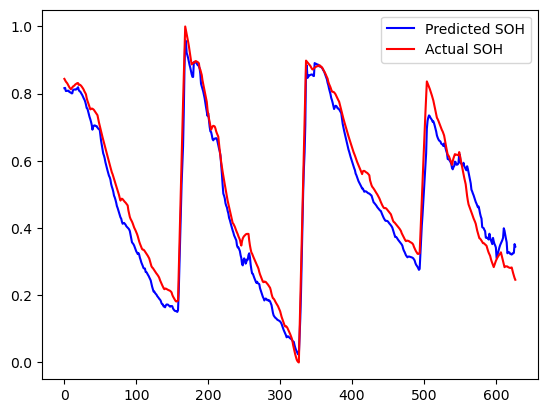

In [61]:
combined_datap = np.concatenate((trainPredict,valPredict, testPredict), axis=0)
combined_data = np.concatenate((y_train,y_val,y_test), axis=0)
plt.plot(combined_datap, color = 'blue', label = 'Predicted SOH')
plt.plot(combined_data, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

In [62]:
X_data = np.arange(439, 628)


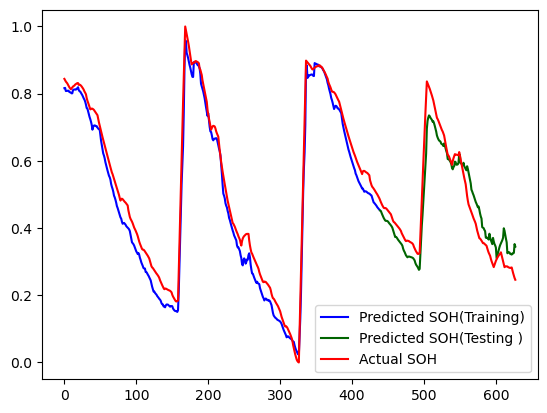

In [63]:
combined_datap = np.concatenate((trainPredict,valPredict, testPredict), axis=0)
combined_data = np.concatenate((y_train,y_val,y_test), axis=0)
plt.plot(trainPredict,color = 'blue', label = 'Predicted SOH(Training)')
z=np.concatenate((valPredict,testPredict), axis=0)
plt.plot( X_data,z,color = 'darkgreen', label = 'Predicted SOH(Testing )')
plt.plot(combined_data, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

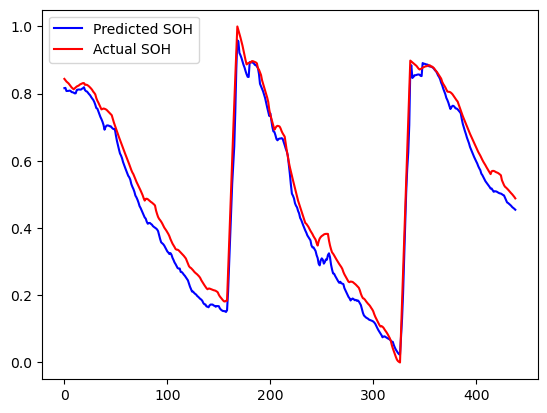

In [64]:
plt.plot(trainPredict, color = 'blue', label = 'Predicted SOH')
plt.plot(y_train, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

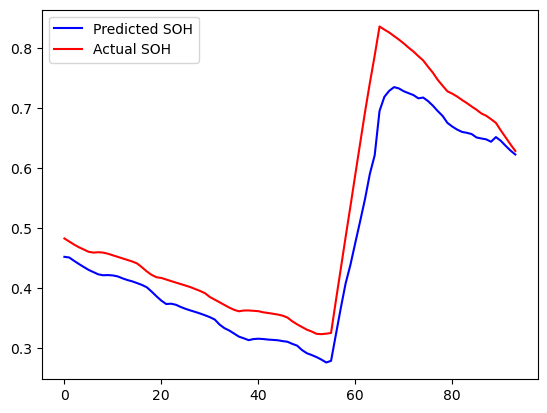

In [65]:
plt.plot(valPredict, color = 'blue', label = 'Predicted SOH')
plt.plot(y_val, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

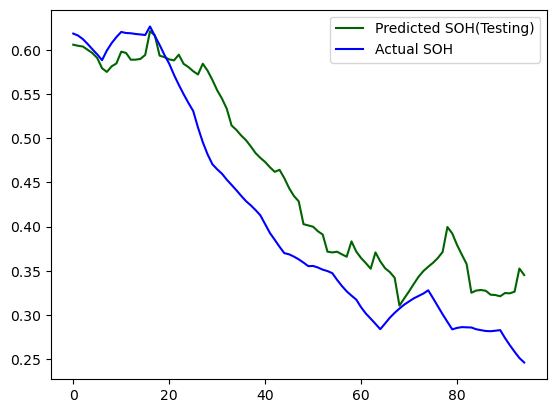

In [66]:
plt.plot(testPredict, color = 'darkgreen', label = 'Predicted SOH(Testing)')
plt.plot(y_test, color = 'blue', label = 'Actual SOH')

plt.legend()
plt.show()

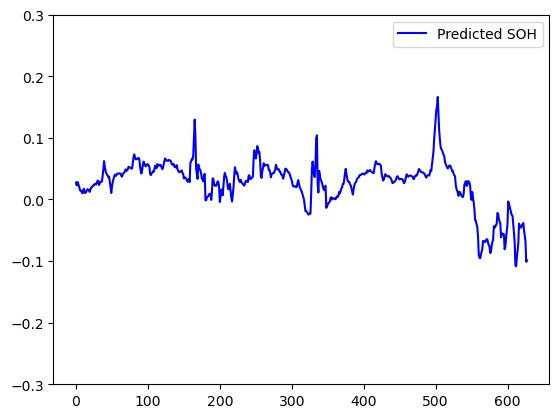

In [67]:

plt.plot(combined_data-combined_datap, color = 'blue', label = 'Predicted SOH')
yticks_positions = [-0.3, -0.2,-0.1,0.0 ,0.1,0.2,0.3]
#yticks_labels = ['0%', '20%', '40%', '60%', '80%', '100%']

# Apply the yticks
#plt.yticks(yticks_positions, yticks_labels)
plt.yticks(yticks_positions)

plt.legend()
plt.show()  

In [68]:
r2_score(combined_data, combined_datap)

0.9597483634001194

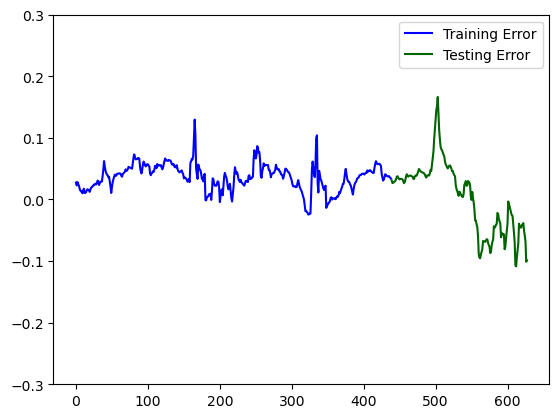

In [69]:

plt.plot(y_train-trainPredict, color = 'blue', label = 'Training Error')
#plt.plot(combined_data-combined_datap, color = 'blue', label = 'Error')
X_data = np.arange(439, 628)
z=np.concatenate((valPredict,testPredict), axis=0)
p=np.concatenate((y_val,y_test), axis=0)
plt.plot(X_data,p-z, color = 'darkgreen', label = 'Testing Error')
yticks_positions = [-0.3, -0.2,-0.1,0.0 ,0.1,0.2,0.3]
#yticks_labels = ['0%', '20%', '40%', '60%', '80%', '100%']

# Apply the yticks
#plt.yticks(yticks_positions, yticks_labels)
plt.yticks(yticks_positions)
plt.legend()
plt.show()  


In [70]:
import tensorflow as tf


model =  regressor



In [71]:
model.save('./saved_model_best')

INFO:tensorflow:Assets written to: ./saved_model_best\assets


INFO:tensorflow:Assets written to: ./saved_model_best\assets
